In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
#starting to load, explore and clean our main dataset
df = pd.read_excel('just tacos and burritos.xlsx')
df.head()

,id,address,categories,city,country,cuisines,dateAdded,dateUpdated,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.category,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,websites
0,AVwc__cikufWRAb51QjV,610 Commercial St,"Restaurant Delivery Service,Restaurants,Pizza,...",Atchison,US,Restaurant Delivery Service,2016-03-02T11:49:34Z,2017-02-01T18:04:44Z,us/ks/atchison/610commercialst/-138126000,39.561570,-95.121020,http://www.yellowpages.com/atchison-ks/mip/gam...,NaN,NaN,NaN,NaN,2017-02-01T18:04:44Z,NaN,Taco,Gambino's Pizza,66002,NaN,NaN,NaN,KS,http://www.gambinospizza.com
1,AVwc__cikufWRAb51QjV,610 Commercial St,"Restaurant Delivery Service,Restaurants,Pizza,...",Atchison,US,Restaurant Delivery Service,2016-03-02T11:49:34Z,2017-02-01T18:04:44Z,us/ks/atchison/610commercialst/-138126000,39.561570,-95.121020,http://www.yellowpages.com/atchison-ks/mip/gam...,NaN,NaN,NaN,NaN,2016-03-02T11:49:34Z,"Beef, onion, cheddar cheese, lettuce, refried...",Taco,Gambino's Pizza,66002,NaN,NaN,NaN,KS,http://www.gambinospizza.com
2,AVwc__dF_7pvs4fz1Ncy,9521 Morton Davis Dr,"Golf Course, American Restaurant, and Resort",Patterson,US,NaN,2016-10-14T01:58:25Z,2016-10-14T01:58:25Z,us/grayson/patterson/9521mortondavisdr/-522005016,37.401855,-121.266703,NaN,NaN,NaN,NaN,NaN,2016-10-14T01:58:25Z,"Beef barbacoa or chicken, spanish rice, pico d...",Smotherd Burrito,Diablo Grande Golf & Country Club,95363,NaN,NaN,NaN,Grayson,http://www.diablogrande.com/
3,AVwc__kCByjofQCxkdm-,10550 W I 25 Frontage Rd,Fast Food Restaurant,Longmont,US,NaN,2016-09-09T17:30:34Z,2016-10-04T05:15:17Z,us/niwot/longmont/10550wi25frontagerd/-1161002137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-09T17:30:34Z,NaN,Sausage Burrito,Mcdonald's,80504,NaN,NaN,NaN,Niwot,http://mcdonalds.com
4,AVwc__WtByjofQCxkdkR,8495 W 3rd St,"Mexican Restaurant Mid-City West,Mexican Resta...",Los Angeles,US,Mexican,2016-05-19T11:50:25Z,2016-09-11T00:06:37Z,us/bicentennial/losangeles/8495w3rdst/-251199537,34.080724,-118.389578,NaN,NaN,NaN,NaN,NaN,2016-05-19T11:50:25Z,"Wahoo, avocado, cabbage, pico de gallo and av...",Wahoo Tacogrilled,Baja Fresh Mexican Grill,90048,USD,0.0,25.0,Bicentennial,http://bajafresh.com


In [0]:
df.tail()

,id,address,categories,city,country,cuisines,dateAdded,dateUpdated,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.category,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,websites
77255,AVzRLlQNLD2H7whiWdH_,3919 24th St.,Restaurant,San Francisco,US,Mexican,2017-06-22T19:01:33Z,2017-06-22T19:01:33Z,us/california/sanfrancisco/391924thst/-62682760,37.751392,-122.43018,NaN,NaN,NaN,NaN,USD,2017-06-22T16:40:06.448Z,"meat, rice, beans, guacamole, sour cream, chee...",Super Burrito,La Casona Taqueria,94114-3703,NaN,NaN,NaN,California,NaN
77256,AVzRLlQNLD2H7whiWdH_,3919 24th St.,Restaurant,San Francisco,US,Mexican,2017-06-22T19:01:33Z,2017-06-22T19:01:33Z,us/california/sanfrancisco/391924thst/-62682760,37.751392,-122.43018,NaN,NaN,NaN,NaN,USD,2017-06-22T16:40:06.448Z,"melted cheese, rice, beans & salsa",Steamed Broccoli Burrito,La Casona Taqueria,94114-3703,NaN,NaN,NaN,California,NaN
77257,AVzRLlQNLD2H7whiWdH_,3919 24th St.,Restaurant,San Francisco,US,Mexican,2017-06-22T19:01:33Z,2017-06-22T19:01:33Z,us/california/sanfrancisco/391924thst/-62682760,37.751392,-122.43018,NaN,NaN,NaN,NaN,USD,2017-06-22T16:40:06.448Z,meat & salsa,Regular Taco,La Casona Taqueria,94114-3703,NaN,NaN,NaN,California,NaN
77258,AVzRLlQNLD2H7whiWdH_,3919 24th St.,Restaurant,San Francisco,US,Mexican,2017-06-22T19:01:33Z,2017-06-22T19:01:33Z,us/california/sanfrancisco/391924thst/-62682760,37.751392,-122.43018,NaN,NaN,NaN,NaN,USD,2017-06-22T16:40:06.448Z,"meat, rice, beans & salsa",Regular Burrito,La Casona Taqueria,94114-3703,NaN,NaN,NaN,California,NaN
77259,AVzRLlQNLD2H7whiWdH_,3919 24th St.,Restaurant,San Francisco,US,Mexican,2017-06-22T19:01:33Z,2017-06-22T19:01:33Z,us/california/sanfrancisco/391924thst/-62682760,37.751392,-122.43018,NaN,NaN,NaN,NaN,USD,2017-06-22T16:40:06.448Z,"stuffed with rice, beans, meat, topped with en...",Azteca Burrito,La Casona Taqueria,94114-3703,NaN,NaN,NaN,California,NaN


In [0]:
#checking for NAN values in our set
print(df.isnull().sum())
print(df.shape)

id                        0
address                   0
categories                0
city                      0
country                   0
cuisines              38876
dateAdded                 0
dateUpdated               0
keys                      0
latitude              21624
longitude             21624
menuPageURL           67206
menus.amountMax       37000
menus.amountMin       37000
menus.category        73531
menus.currency        36749
menus.dateSeen            0
menus.description     47937
menus.name                0
name                      3
postalCode              423
priceRangeCurrency    29101
priceRangeMin         29101
priceRangeMax         29101
province                  3
websites              21271
dtype: int64
(77260, 26)


In [0]:
df = df.drop('id',axis=1)

df.head()

,address,categories,city,country,cuisines,dateAdded,dateUpdated,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.category,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,websites
0,610 Commercial St,"Restaurant Delivery Service,Restaurants,Pizza,...",Atchison,US,Restaurant Delivery Service,2016-03-02T11:49:34Z,2017-02-01T18:04:44Z,us/ks/atchison/610commercialst/-138126000,39.561570,-95.121020,http://www.yellowpages.com/atchison-ks/mip/gam...,NaN,NaN,NaN,NaN,2017-02-01T18:04:44Z,NaN,Taco,Gambino's Pizza,66002,NaN,NaN,NaN,KS,http://www.gambinospizza.com
1,610 Commercial St,"Restaurant Delivery Service,Restaurants,Pizza,...",Atchison,US,Restaurant Delivery Service,2016-03-02T11:49:34Z,2017-02-01T18:04:44Z,us/ks/atchison/610commercialst/-138126000,39.561570,-95.121020,http://www.yellowpages.com/atchison-ks/mip/gam...,NaN,NaN,NaN,NaN,2016-03-02T11:49:34Z,"Beef, onion, cheddar cheese, lettuce, refried...",Taco,Gambino's Pizza,66002,NaN,NaN,NaN,KS,http://www.gambinospizza.com
2,9521 Morton Davis Dr,"Golf Course, American Restaurant, and Resort",Patterson,US,NaN,2016-10-14T01:58:25Z,2016-10-14T01:58:25Z,us/grayson/patterson/9521mortondavisdr/-522005016,37.401855,-121.266703,NaN,NaN,NaN,NaN,NaN,2016-10-14T01:58:25Z,"Beef barbacoa or chicken, spanish rice, pico d...",Smotherd Burrito,Diablo Grande Golf & Country Club,95363,NaN,NaN,NaN,Grayson,http://www.diablogrande.com/
3,10550 W I 25 Frontage Rd,Fast Food Restaurant,Longmont,US,NaN,2016-09-09T17:30:34Z,2016-10-04T05:15:17Z,us/niwot/longmont/10550wi25frontagerd/-1161002137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-09T17:30:34Z,NaN,Sausage Burrito,Mcdonald's,80504,NaN,NaN,NaN,Niwot,http://mcdonalds.com
4,8495 W 3rd St,"Mexican Restaurant Mid-City West,Mexican Resta...",Los Angeles,US,Mexican,2016-05-19T11:50:25Z,2016-09-11T00:06:37Z,us/bicentennial/losangeles/8495w3rdst/-251199537,34.080724,-118.389578,NaN,NaN,NaN,NaN,NaN,2016-05-19T11:50:25Z,"Wahoo, avocado, cabbage, pico de gallo and av...",Wahoo Tacogrilled,Baja Fresh Mexican Grill,90048,USD,0.0,25.0,Bicentennial,http://bajafresh.com


In [0]:
df.describe()

,latitude,longitude,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax
count,55636.000000,55636.000000,40260.000000,40260.000000,48159.000000,48159.000000
mean,36.694846,-98.713309,8.754767,8.611666,13.734837,33.722627
std,4.835124,18.245857,18.408596,15.708317,14.704344,10.395812
min,-31.986438,-159.492690,0.000000,0.000000,0.000000,5.000000
25%,33.668355,-117.647150,5.000000,5.000000,0.000000,25.000000
50%,36.047195,-96.682320,7.950000,7.950000,25.000000,40.000000
75%,40.588380,-82.679930,10.500000,10.390000,25.000000,40.000000
max,61.219460,115.903696,1990.000000,1290.000000,378.000000,755.000000


In [0]:
#here we are checking the count of restaurants per city
df['city'].value_counts()

San Diego        1924
Los Angeles      1603
Chicago          1186
San Francisco    1120
New York         1085
                 ... 
Greenland           1
Gardner             1
Saint Albans        1
Cataumet            1
Sunrise Beach       1
Name: city, Length: 3601, dtype: int64

In [0]:
#creating new features out of the dataframe to get the information we need
top_cities = pd.DataFrame(df['city'].value_counts(),columns=['city'])

In [0]:
top_cities.head()

,city
San Diego,1924
Los Angeles,1603
Chicago,1186
San Francisco,1120
New York,1085


In [0]:
#resetting the index since originally the index was set to the cities
top_cities.reset_index(inplace=True)
top_cities

,index,city
0,San Diego,1924
1,Los Angeles,1603
2,Chicago,1186
3,San Francisco,1120
4,New York,1085
...,...,...
3596,Greenland,1
3597,Gardner,1
3598,Saint Albans,1
3599,Cataumet,1


In [0]:
#renaming the columns of the new features
top_cities.rename(columns={'index':'cities','city':'rest_count'},inplace=True)
top_cities.head(10)

,cities,rest_count
0,San Diego,1924
1,Los Angeles,1603
2,Chicago,1186
3,San Francisco,1120
4,New York,1085
5,Houston,838
6,Brooklyn,711
7,Las Vegas,653
8,Portland,571
9,Phoenix,525


In [0]:
top_cities.dtypes

cities        object
rest_count     int64
dtype: object

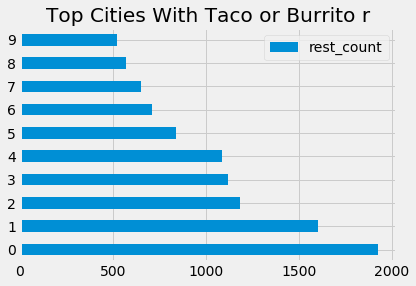

In [0]:
#control visualization plot
top_cities.head(10).plot(kind='barh',title='Top Cities With Taco or Burrito r')
plt.show()

In [0]:
#top 10 cities filtered
top_10 = top_cities.head(10)
top_10

,cities,rest_count
0,San Diego,1924
1,Los Angeles,1603
2,Chicago,1186
3,San Francisco,1120
4,New York,1085
5,Houston,838
6,Brooklyn,711
7,Las Vegas,653
8,Portland,571
9,Phoenix,525


In [0]:
cities = top_10.cities.sort_values(ascending=False)
cities

3    San Francisco
0        San Diego
8         Portland
9          Phoenix
4         New York
1      Los Angeles
7        Las Vegas
5          Houston
2          Chicago
6         Brooklyn
Name: cities, dtype: object

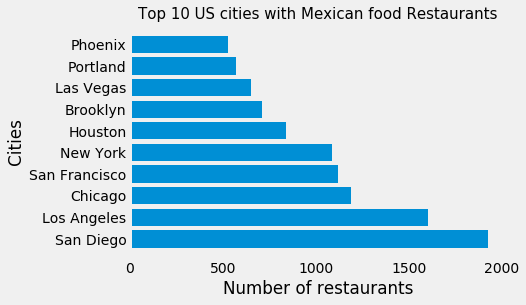

In [0]:
#main barplot explaining what the top cities are
fig , ax = plt.subplots()
plt.style.use('fivethirtyeight')
ax.barh(top_10['cities'],top_10['rest_count'])

#fig.set_facecolor('white') i removed this so it looks better
ax.set_title('Top 10 US cities with Mexican food Restaurants',fontsize=15)
ax.set_ylabel('Cities')
ax.set_xlabel('Number of restaurants')
ax.grid(b=False)
fig.set_frameon(True)
plt.show()

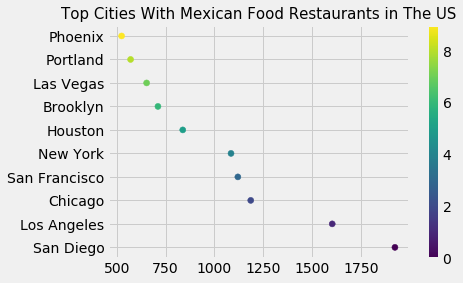

In [0]:
#playing around with a colorbar feature
plt.scatter(top_10['rest_count'],top_10['cities'],c=top_10.index)
plt.title('Top Cities With Mexican Food Restaurants in The US',fontsize=15)
plt.colorbar()
plt.show()

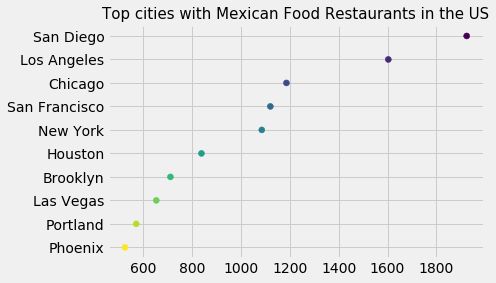

In [0]:
#here is the 2 plot for my data
fig , ax = plt.subplots()
plt.style.use('fivethirtyeight')

ax.scatter(top_10['rest_count'],top_10['cities'],c=top_10.index)
ax.set_title('Top cities with Mexican Food Restaurants in the US',fontsize=15)
ax.invert_yaxis()
plt.show()

In [0]:
#attempt to make a heatmap with google maps
pip install gmplot

In [0]:
import gmplot
from IPython.display import display

In [0]:
#setting up the lat lon variables
latitude = df['latitude']
longitude = df['longitude']
#setting up the map initial point
gmap = gmplot.GoogleMapPlotter(38.878043,-96.671332,5)
gmap.heatmap(latitude,longitude)
gmap.draw('my_heatmap.html')

# heatmap: fail
i attempted to make a heatmap with this library but i was not loading correctly, not sure why.

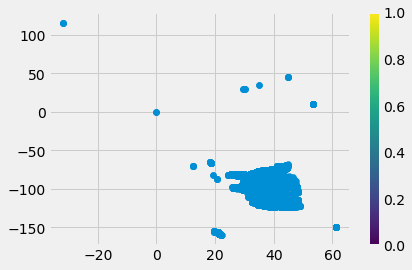

In [0]:
#in this plot i was jut playing a littlebit with the data
plt.scatter(latitude,longitude)
plt.colorbar()
plt.show()